<a href="https://colab.research.google.com/github/unverciftci/to_Uniform/blob/main/DataToUniformMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

Data shape (1797, 64)


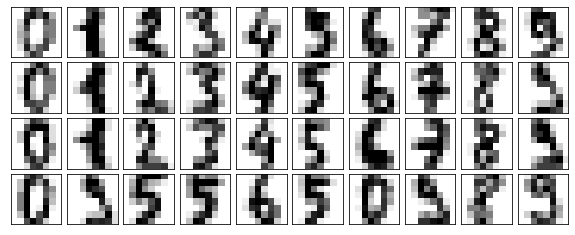

In [2]:
from sklearn.datasets import load_digits


digits = load_digits()
X = digits.data
print('Data shape', X.shape)


def plot_digits(data, w=8):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(w, w),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)



In [3]:
X = digits.data
y = digits.target

In [4]:
X = X.reshape(1797, 64)
X = (X - X.min()) / (X.max()-X.min())

In [5]:
tf.random.set_seed(0)

inputs = keras.Input((64,))
x = keras.layers.Dense(
    units=512,
    activation='sigmoid'
)(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=128,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(
    units=64,
    activation='sigmoid'
)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(units=24,
    activation='sigmoid')(x)
outputs = keras.layers.BatchNormalization()(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
tf.random.set_seed(0)

def m_loss(a, b):
  return -keras.losses.MSE(a, b)

model.compile(loss=m_loss)

In [7]:
tf.random.set_seed(0)

for i in range(20):
   np.random.seed(i)
   X_ = X + np.random.normal(loc=0., scale=0.000001, size=(1797, 64))
   Y_ = model(X_)
   model.fit(X, Y_, batch_size=500,verbose=0)

In [8]:
Y = model.predict(X)

57/57 [==============================] - 1s 5ms/step


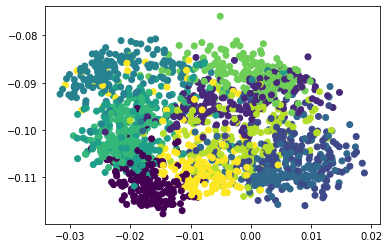

In [9]:
plt.scatter(Y[:,0], Y[:,1], c=y)
plt.show()